In [ ]:
import requests
import base64

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid, imgs

In [ ]:
input_img_name = 'gabbie-carter-5.jpg'

In [ ]:
with open(input_img_name, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

In [ ]:
res = requests.post('http://localhost:8889/ip/', json={
    'task': {
        'ip': encoded_string.decode('ascii'),
        'prompt': 'wide shot of a young woman laying naked on the beach, legs wide open, highest quality, professional photo shoot, 8k, HDR',
        'options': {
            #'num_inference_steps': 50,
            #'guidance_scale': 7.5,
            #'seed': 420,
            'negative_prompt': 'monochrome, lowres, bad anatomy, worst quality, low quality, blurry',
            #'s_scale': 0.7
        }
    }
})

In [ ]:
with open('foo.png', 'wb') as f:
    f.write(base64.decodebytes(res.json()['image'].encode('ascii')))

In [ ]:
from PIL import Image
output_img = Image.open('foo.png')
input_img = Image.open(input_img_name).resize((512, 768))

In [ ]:
image_grid([input_img, output_img], 1, 2)[0]

In [ ]:
res = requests.post('http://localhost:8889/ip-faces/', json={
    'task': {
        'ip': encoded_string.decode('ascii'),
        'prompt': 'wide shot of a young woman laying naked on the beach, highest quality, professional photo shoot, 8k, HDR',
        'options': {
            'num_inference_steps': 35,
            'guidance_scale': 7.5,
            'seed': 420,
            'negative_prompt': 'monochrome, lowres, bad anatomy, worst quality, low quality, blurry',
            's_scale': 0.05
        }
    }
})

In [ ]:
import base64
images = [
    # YOUR IMAGES
]
encoded_imgs = []
for img in images:
    with open(img, "rb") as image_file:
        encoded_imgs.append(base64.b64encode(image_file.read()).decode('ascii'))

In [ ]:
import requests
prompt = "YOUR PROMPT"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, blurry"
res = requests.post('http://localhost:8889/ip-faces-multi/', json={
    'task': {
        'images': encoded_imgs,
        'prompt': prompt,
        'options': {
            'num_inference_steps': 30,
            'negative_prompt': negative_prompt,
            #'guidance_scale': 7.5,
            'seed': 420,
            #'negative_prompt': 'monochrome, lowres, bad anatomy, worst quality, low quality, blurry',
            #'s_scale': 0.05
        }
    }
})

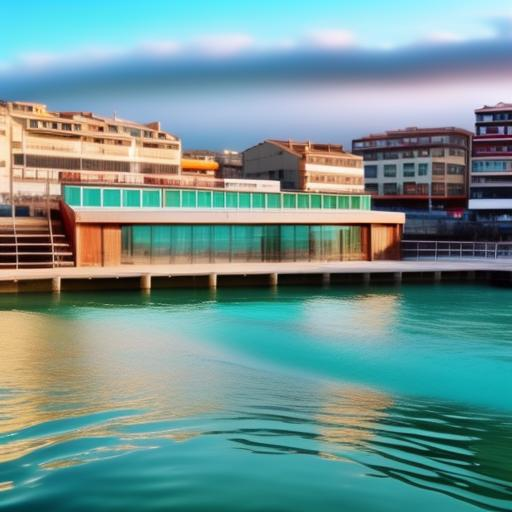

In [35]:
from huggingface_hub import InferenceClient
import base64

client = InferenceClient("http://localhost:7777/models/ip/image-to-image/")
with open('foo.jpeg', "rb") as image_file:
    ip = image_file.read()
response = client.image_to_image(ip, "A fast speedboat", seed=420, num_inference_steps=10)
response

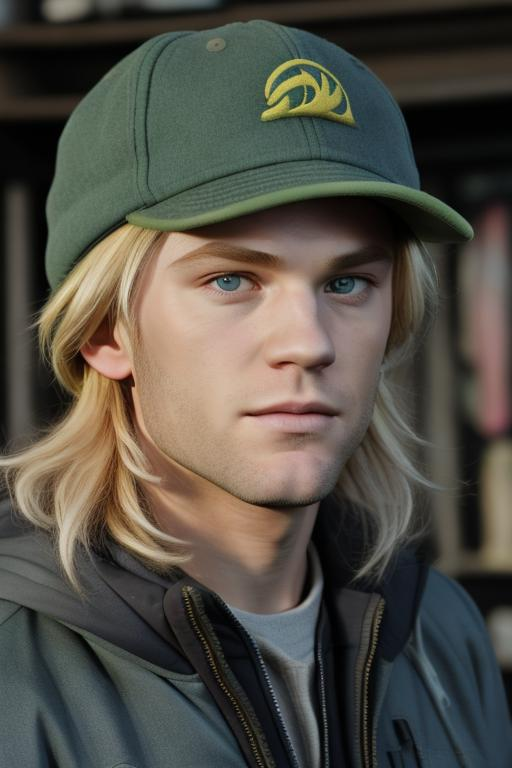

In [49]:
from huggingface_hub import InferenceClient
import base64

client = InferenceClient("http://localhost:7777/models/ip-faces/image-to-image/")
with open('portrait_you_2.jpg', "rb") as image_file:
    ip = image_file.read()
response = client.image_to_image(ip, "professional portrait of A blond man with a basecap", seed=420, num_inference_steps=25, images=[base64.b64encode(ip).decode('ascii')], width=512, height=768)
response

In [77]:
from huggingface_hub import InferenceClient
import base64

client = InferenceClient("http://localhost:7777/models/ip-faces/image-to-image/")
images = ['./girl.jpeg',]

payload_images = []
for img in images:
  with open(img, "rb") as image_file:
    payload_images.append(base64.b64encode(image_file.read()).decode('ascii'))

response = client.image_to_image(b'foo', "A professional portrait of a young woman with long brown hair and a baseball hat with a marijuana symbol", images=payload_images, 
                                num_inference_steps=35, width=512, height=768, seed=420, num_samples=2)
response

HfHubHTTPError: 500 Server Error: Internal Server Error for url: http://localhost:7777/models/ip-faces/image-to-image/